# **重回帰分析と多重共線性**
重回帰分析において多重共線性の評価ができ、適切に変数を統合・加工・削除して予測モデルが構築できる

**多重共線性**とは、重回帰分析において、説明変数間の相関が高い場合、その標準誤差が大きくなってしばしば偏回帰係数が極端に大きな値を取ったり、符合が予想と逆転するなど、推定結果が不安定になることをいう。

多重共線性は英語で multi colinearity ということから、**マルチコ**と呼ばれることもある。

たとえば、年間消費支出額 $y$ を給与額 $x_1$ と賞与額 $x_2$ を説明変数として $ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 $ のように回帰モデルを組んだ場合、多重共線性を引き起こして異常な $\beta_1, \beta_2$ をもたらしかねない。賞与額は給与額の何か月分と定められていることが多く、両者には一般的に強い相関が認められるからである。

### **多重共線性が生じているかの確認**

回帰モデルを組んだ際、説明変数間で多重共線性が起きていないかを確認するには、モデルを組む際に散布図を描いたり相関係数を計算するなどして、多重共線性の有無を事前に検討することが必要になる。

In [4]:
# モジュールとデータの読み込み
import numpy as np
import statsmodels.api as sm
import scipy
import matplotlib.pyplot as plt

spector_data = sm.datasets.spector.load()
spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)

散布図を描いて確認

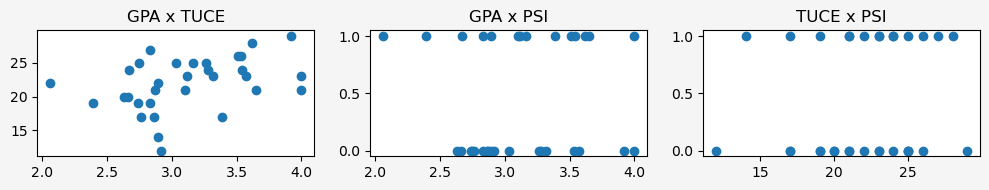

In [25]:
# サブプロットで複数のグラフを同時に描画
fig, axes = plt.subplots(1, 3, figsize=(10, 2), tight_layout=True, facecolor="whitesmoke")

# グラフの描画設定
axes[0].scatter(spector_data.exog["GPA"], spector_data.exog["TUCE"])
axes[0].title.set_text("GPA x TUCE")
axes[1].scatter(spector_data.exog["GPA"], spector_data.exog["PSI"])
axes[1].title.set_text("GPA x PSI")
axes[2].scatter(spector_data.exog["TUCE"], spector_data.exog["PSI"])
axes[2].title.set_text("TUCE x PSI")

# グラフを描画
plt.show()

説明変数間の相関係数を計算

In [37]:
import seaborn as sns

# 切片項の相関は確認不要のため除外
X = spector_data.exog.drop("const", axis=1)

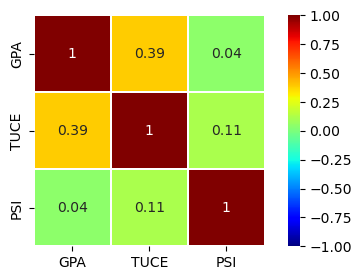

In [39]:
# グラフ描画領域の作成
plt.figure(figsize=(6, 3))

# 相関係数のヒートマップを描画
sns.heatmap(X.corr(),
            cmap='jet',
            square=True,
            linewidths=0.1,
            vmax=1,
            vmin=-1,
            center=0,
            annot=True)

plt.show()

GPA と TUCE の間にやや弱い相関がみられますが、相関係数が 0.39 とそれほど強くないので今回は両者を説明変数に含めてもよいように思われます。

### **多重共線性が起きているときの対処法**

『人文・社会科学の統計学』では、多重共線性が起きているときの対処法として以下が挙げられています。
- 原因となっている変数を取り除く
- リッジ推定や主成分回帰など分析法を工夫する

これらの分析手法については項を改めてまとめようと思います。

### **参考文献**

- 東京大学教養学部統計学教室編『人文・社会科学の統計学』(東京大学出版会、1994年)
- 永田靖・棟近雅彦共著『多変量解析法入門』(サイエンス社、2001年)